# hw4-6 文字探勘
## 想要做歌曲歌詞關鍵詞整理，看看獨立樂團的歌詞內容是否真的很厭世

選取樂團：粉紅噪音

選取歌曲：入迷、Till the Day、獵戶座、告別、唉唷威沒錯、涅槃、夢失落、七零年代、Beauty in Your Eyes、Ann

歌詞來源：StreetVoice

文字預處理：同首歌之間以空白分隔歌詞，不同首之間以enter區隔，去除標點符號

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud

#使用繁中字典
jieba.set_dictionary("C:/Users/Tsai Jessica/Anaconda3/Lib/site-packages/jieba/dict.txt.big.txt")

In [2]:
#把Ann這首歌單獨提出來看關鍵字
with open("lyrics_single.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line, topK=10, withWeight=True)
        for tag, weight in tags:
            print(tag + "," + str(int(weight * 10000)))

Building prefix dict from C:\Users\Tsai Jessica\Anaconda3\Lib\site-packages\jieba\dict.txt.big.txt ...
Loading model from cache C:\Users\TSAIJE~1\AppData\Local\Temp\jieba.ucde4370ccb3e282c50f4514e287db922.cache
Loading model cost 0.769 seconds.
Prefix dict has been built succesfully.


不論,5475
孤單,4562
承擔,4562
仍想,2737
獨自,2737
夜裡,2737
瀰漫,2737
從來,2737
難堪,2737
仔細,2737


In [3]:
#列出十首歌的關鍵字
with open("lyrics.txt", "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,10)
        print(",".join(tags))

不論,孤單,承擔,仍想,獨自,夜裡,瀰漫,從來,難堪,仔細

還不想,流著淚,選擇,轉身,以後,甚麼,我們,之間,當時,隱晦

脆弱,徬徨,偏執,已過,你們,曾經,新世代,起跑點,恐嚇,競爭力
創造,屬於,必須,偏執,已過,脆弱,年少,自己,流血,你們

我們,摹刻,輕蔑,地笑,學會,還在,走來,風雨,飄盪,鎩羽而歸

慾火,纏繞,涅槃,孤鬱,最後,波瀾,純真,超脫,輪轉,難解

哎呦,微沒錯,沒什麼,真的,為什麼,時候,沒有,絕不,差錯,這一刻

怎樣,遼闊,絢麗,美豔,動人,無語,過心底,無盡,曠野,神采

為了,天邊,飛越,還是,一切,穿越,黑夜,沒有,太遠,掠過

找尋,時間,會不會,一種,寬容,總在,藉口,逃離,這個,或許

還咬著,憂傷,獨留,戀人,未馴,動物,野性,在世,曾經,髒污


In [4]:
# 將每首歌的前10個tag存檔
import codecs
wtags = codecs.open("lyrics_tags.txt", "w", encoding="utf-8")
with open("lyrics.txt", "r", encoding="utf-8") as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10)
        wtags.write(" ".join(words))
f1.close()

In [5]:
# 讀取每首歌的前10個tag
text = open("lyrics_tags.txt", encoding="utf-8").read()
text

'不論 孤單 承擔 仍想 獨自 夜裡 瀰漫 從來 難堪 仔細還不想 流著淚 選擇 轉身 以後 甚麼 我們 之間 當時 隱晦脆弱 徬徨 偏執 已過 你們 曾經 新世代 起跑點 恐嚇 競爭力創造 屬於 必須 偏執 已過 脆弱 年少 自己 流血 你們我們 摹刻 輕蔑 地笑 學會 還在 走來 風雨 飄盪 鎩羽而歸慾火 纏繞 涅槃 孤鬱 最後 波瀾 純真 超脫 輪轉 難解哎呦 微沒錯 沒什麼 真的 為什麼 時候 沒有 絕不 差錯 這一刻怎樣 遼闊 絢麗 美豔 動人 無語 過心底 無盡 曠野 神采為了 天邊 飛越 還是 一切 穿越 黑夜 沒有 太遠 掠過找尋 時間 會不會 一種 寬容 總在 藉口 逃離 這個 或許還咬著 憂傷 獨留 戀人 未馴 動物 野性 在世 曾經 髒污'

In [6]:
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["我們","你們","甚麼","那個","沒有","你們我們","已過"])

In [7]:
# 產生文字雲
wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
wc.generate(text)

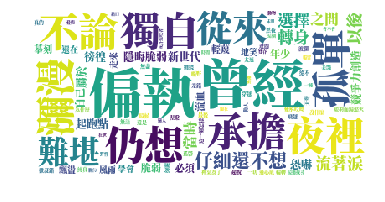

<Figure size 8400x8400 with 0 Axes>

In [8]:
# 視覺化
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(12,12), dpi = 700)
plt.show()

結果顯示許多詞如承擔、孤單、夜裡、獨自、徬徨等都有負面陰暗的感覺，因此此樂團的歌曲歌詞真的都蠻厭世的。